# MNIST Dimensionality Reduction:
The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.
The name for the dataset came from "National Institute of Standards and Technology" (NIST), as the Modified NIST or MNIST dataset.
<p> Each image is a 28 by 28 pixel square (28 x 28 = 784 pixels total). <p>
 

# Load MNIST Data 

In [5]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Raw string is used to prevent unicode error
Path  = r'C:\Users\Sravanth\Desktop\ML\Datasets\CSV\mnist_train.csv' #Full path of train data set in my pc
 
d0 = pd.read_csv(Path)

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [6]:
print(d.shape)# shape (rows,columns) of pixel data
print(l.shape[0])# No.of labels

(42000, 784)
42000


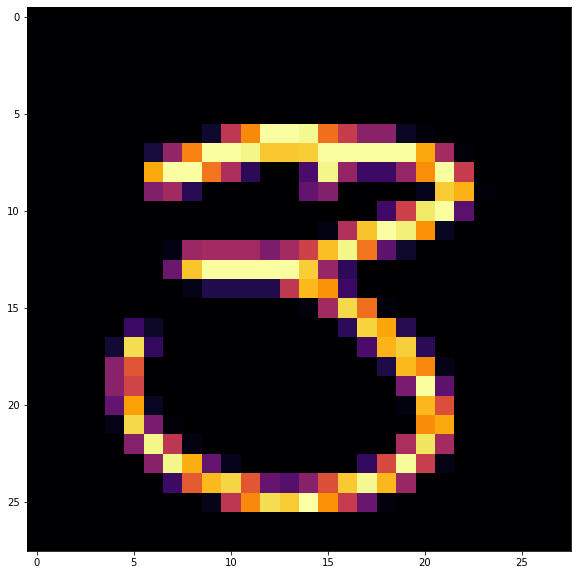

See below... See below... See below... See below... See below... See below... See below... 

 3


In [7]:
# Plotting a random number.
plt.figure(figsize=(10,10))
idx = 7 # index location
grid_data = d.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap =  'inferno')
plt.show()
# Let's see what is there at the index location.
print('See below... '*7)
print('\n',l[idx]) 

# Principal Component Analysis:
* PCA is one of the weakest/simplest technique for dimensionality reduction.
* PCA is also called as the MAXVARIANCE method.
* We are going to visualize MNIST in 2D, so the number of principal components = 2.
* These are the directions along which most (or at least some significant amount) of the data is spread across.

In [8]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)


(42000, 784)


In [9]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)


The shape of variance matrix =  (784, 784)


In [10]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[0] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[1] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [11]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [12]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, l)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("2nd_principal", "1st_principal", "label"))
print(dataframe.head())

   2nd_principal  1st_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


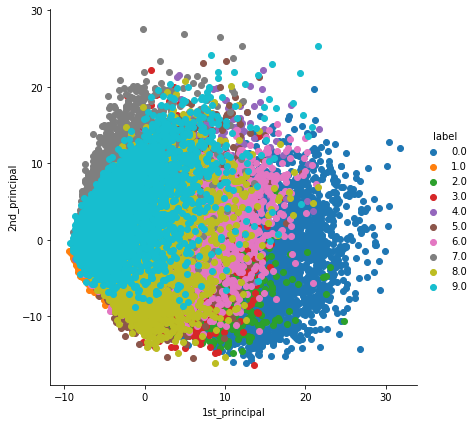

In [13]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA using Scikit-Learn
* Instead of writing all the above code we can use Scikit-Learn library for the better implementation

In [14]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [15]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (42000, 2)


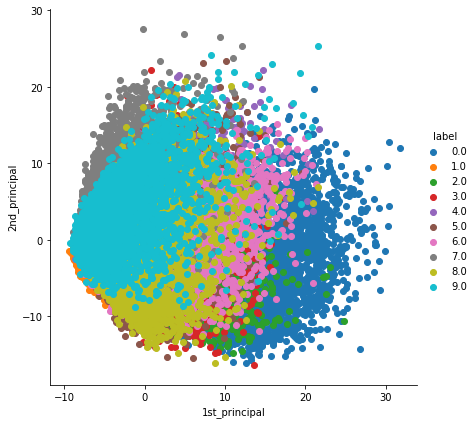

In [16]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, l)).T

# creating a new data frame which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for Dimensionality Redcution (Non-Visualization):
Let's see how many principal components needed to maximize variance explained. 


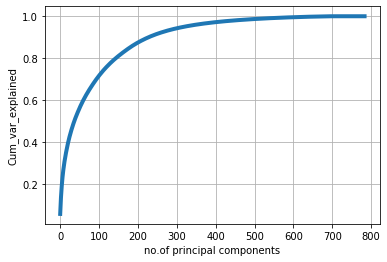

In [17]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=4)
plt.axis('tight')
plt.grid()
plt.xlabel('no.of principal components')
plt.ylabel('Cum_var_explained')
plt.show()


 # Observations:
* Preserves the global shape of the data.
* We can visualize most of the data using pca.However , we cannot draw boundaries or separate them perfectly.
* It's harder to classify based on only 2 principal components.
* If we take 200 principal components then we'll get around 90 % variance explained.

# t-SNE using Scikit-Learn:
* It is one of the best dimensionality technique.
* It is a probablistic algorithm.
* The math behind t-SNE is fairly advanced.
* t-distribution is added to SNE (together t-SNE) in order to avoid crowding problem.

In [23]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
# Picking the top 7k points as TSNE takes a lot of time for 42K points
data_7k = standardized_data[0:7000,:]
labels_7k = l[0:7000]

# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

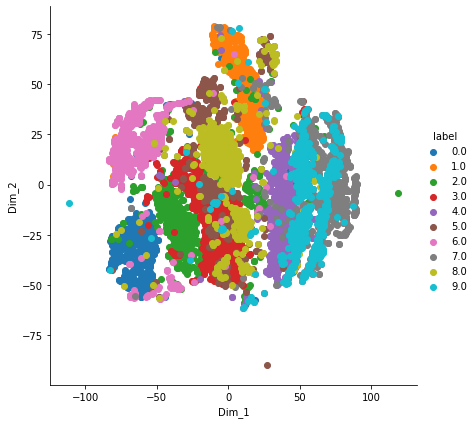

In [18]:
tsne_data = model.fit_transform(data_7k)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_7k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

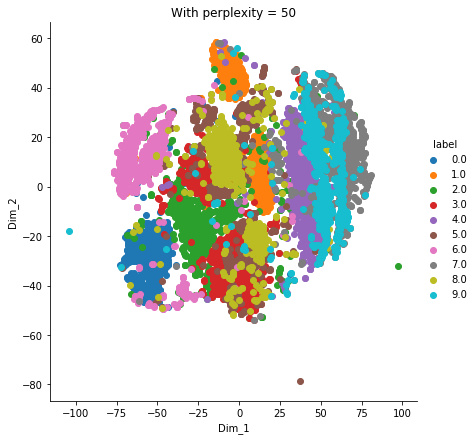

In [19]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_7k) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_7k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

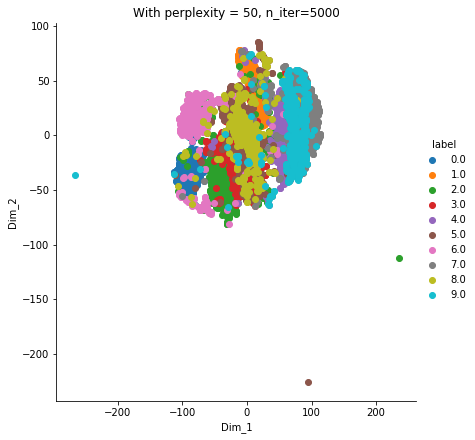

In [20]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_7k) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_7k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

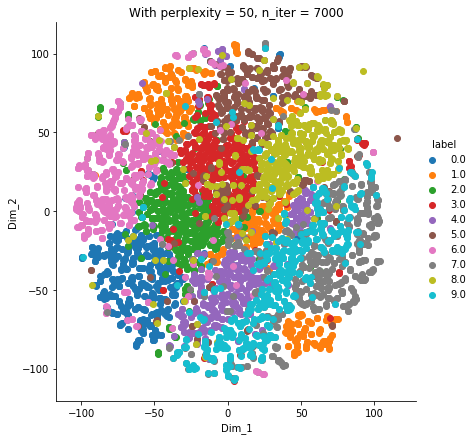

In [21]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_7k)

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_7k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2 ')
plt.show() 

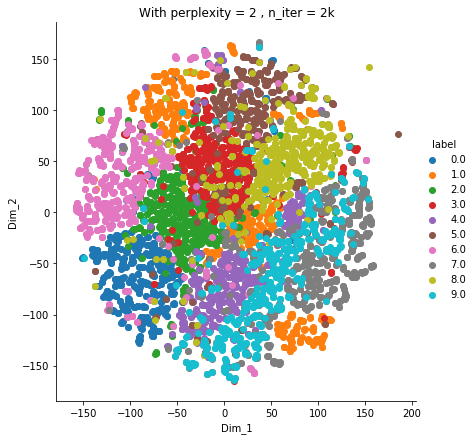

In [24]:
model = TSNE(n_components=2, random_state=0, perplexity=2, n_iter= 2000)
tsne_data = model.fit_transform(data_7k) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_7k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2 , n_iter = 2k')
plt.show()

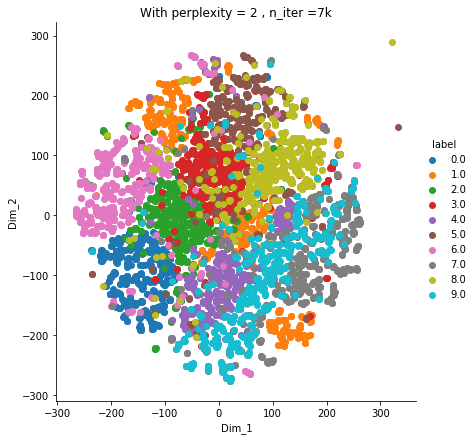

In [25]:
model = TSNE(n_components=2, random_state=0, perplexity=2,n_iter = 7000)
tsne_data = model.fit_transform(data_7k) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_7k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2 , n_iter =7k')
plt.show()

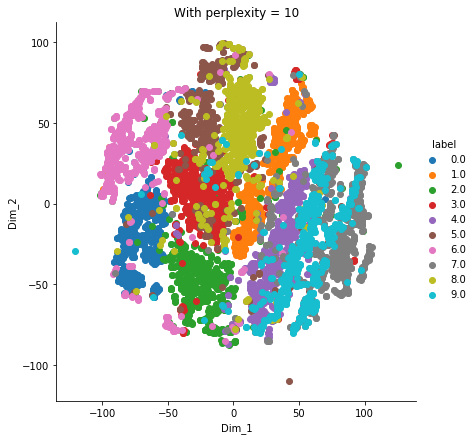

In [26]:
model = TSNE(n_components=2, random_state=0, perplexity = 10)
tsne_data = model.fit_transform(data_7k) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_7k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 10')
plt.show()

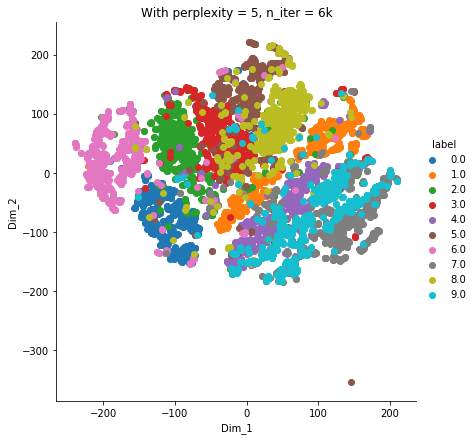

In [28]:
model = TSNE(n_components=2, random_state=0, perplexity = 5 , n_iter= 6000)
tsne_data = model.fit_transform(data_7k) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_7k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 5, n_iter = 6k')
plt.show()

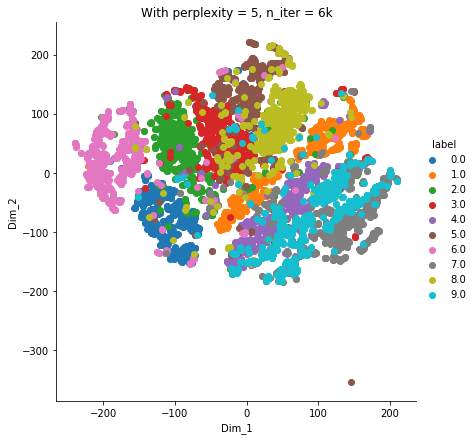

In [29]:
model = TSNE(n_components=2, random_state=0, perplexity = 5 , n_iter= 6000)
tsne_data = model.fit_transform(data_7k) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_7k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 5, n_iter = 6k')
plt.show()

# Observations:
* It's good to run t-SNE with multiple perplexity and step( n_iter ) values to understand the actual classification.
* If we run t-SNE by fixing the two parameters( perplexity and step) multiple times, we could get slightly different results.
* However, it tries to retain the shape.
* Never run t-SNE only once.
* t-SNE groups images based on their visual similarity.


# Conclusion:
* Visualizing the data that is higher than 3D is impossible for humans.
* To visualize the data in 2D or in 3D we use dimensionality reduction techniques.
* We used 2 dimensionality reduction techniques to visualize the data.
* PCA is not a good choice for visualizing , as we need a minimum of 200 principal components to explain maximum variance.
* t-SNE did the job very well.It separated the data into individual clusters after running for multiple times. 
* Similarly we can visualize the data in 3D by putting n_componets = 3. 